# **AICTE_INTERNSHIP project with the guidance of Edunet foundation and EY**
## **Context:**
### The dataset was carefully selected focusing on female patients.
## **Data Description:**
### The dataset includes various medical variables and one target variable , "Outcome".The predictor variable encompasses many health metrics like :number of pregancies , plasma glucose concentration, diastolic blood pressure , insuli levels etc. 
## All the necessary packages needed for the project

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


# Reading the Dataset

In [134]:

data=pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [135]:
data.shape

(768, 9)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data Preprocessing :Treating the missing values.**

In [138]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [139]:
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [140]:
selected_columns=['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage=(data[selected_columns]==0).mean()*100

print("The null value percentage for each column:")
print(null_percentage)

The null value percentage for each column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


## Inferences obtained for the above:
### Based on what we understood and analysed :-
#### 1.**Glucose**: It has an an null percentage of only 0.65% , being the lowest among all .
#### 2.**BloodPressure**: with an value of 4.56% , it is the second lowest .
#### 3.**SkinThickness**: A significant portion of the SkinThickness factor has an null value of around 30%.
#### 4.**Insulin**:Null value is highest with around 49% . 

#### All the above Findings suggest that this factors must be treated accordingly in order to maintai the integrity of the data.

## Treating the null value with mean

In [141]:
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [142]:
selected_columns=['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage=(data[selected_columns]==0).mean()*100

print("The null value percentage for each column:")
print(null_percentage)

The null value percentage for each column:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [143]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Inference from null value treatment**:
#### All the columns that contained the null values have been treated and no longer contains any null value. All the null value have been treated that results in 0% null value

# **Detecting outliers**

In [144]:
columns=data[selected_columns]

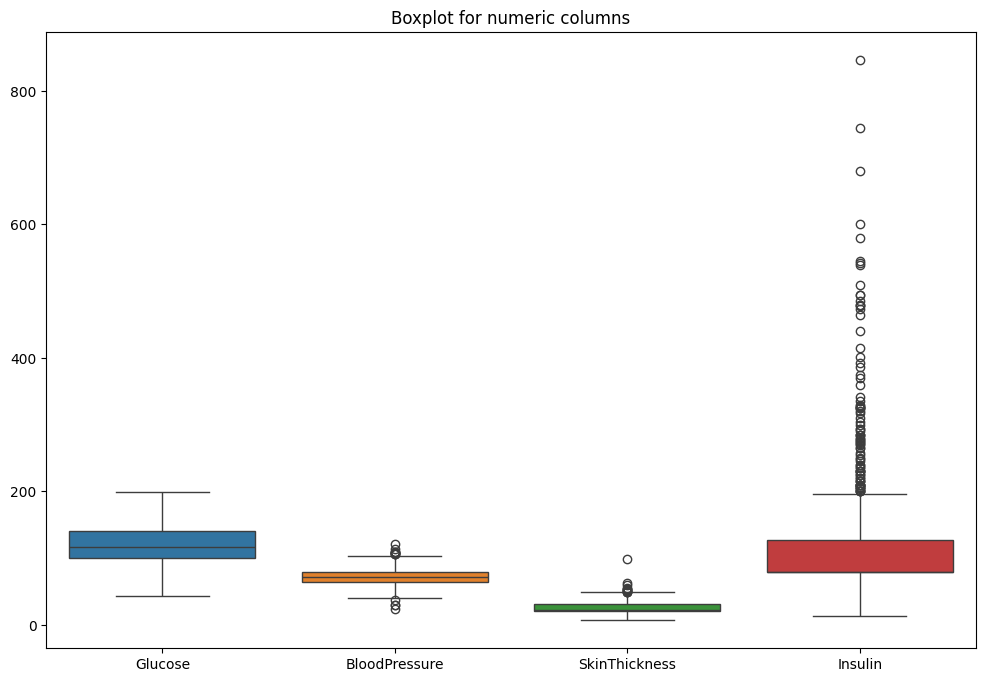

In [145]:
plt.figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title('Boxplot for numeric columns')
plt.show()

In [146]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [147]:
def find_outliers_iqr(data,column_name):
    Q1=data[column_name].quantile(0.25)
    Q3=data[column_name].quantile(0.75)

    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3-1.5*IQR
    outliers=data[(data[column_name]<lower_bound) | (data[column_name]>upper_bound) ]
    count_outliers=len(outliers)
    return count_outliers
for column_name in selected_columns:
    outliers_count=find_outliers_iqr(data,column_name)
    print(f"number of outliers in the column'{column_name}'column:{outliers_count}")
    

number of outliers in the column'Glucose'column:732
number of outliers in the column'BloodPressure'column:707
number of outliers in the column'SkinThickness'column:729
number of outliers in the column'Insulin'column:713


# **Boxplot Analysis:**
#### **Glucose:-**
- There are no outliers.
- IQR is large , indicating a large variabilty in glucose level.
- mean: 121
#### **Blood Pressure:-**
- Few outliers.
- IQR is small , indicating a small variabilty in glucose level.
- mean: 72
#### **SkinThickness:-**
- There are no outliers.
- IQR is very low , where variabilty glucose level might take place or may not.
- mean: 27
#### **Insulin:-**
- There are no outliers.
- IQR is large , indicating a very suggen large variabilty in glucose level.
- mean: 119

# Treating Outliers

In [148]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [149]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(678, 9)
(768, 9)


In [150]:
data_cleared_iqr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


### **Inference obtained after removing the outliers**
1.   **Data Size Reduction:**
   - After removing the outliers using the interquartile range(IQR),the dataset has been reduced from 768 rows to 678 rows.
2.   **Outliers identified:**
     - Outliers were removed from all the columns in whoch they were present.

**Final observations:**
- before rows: 768
- after rows : 678

In [151]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

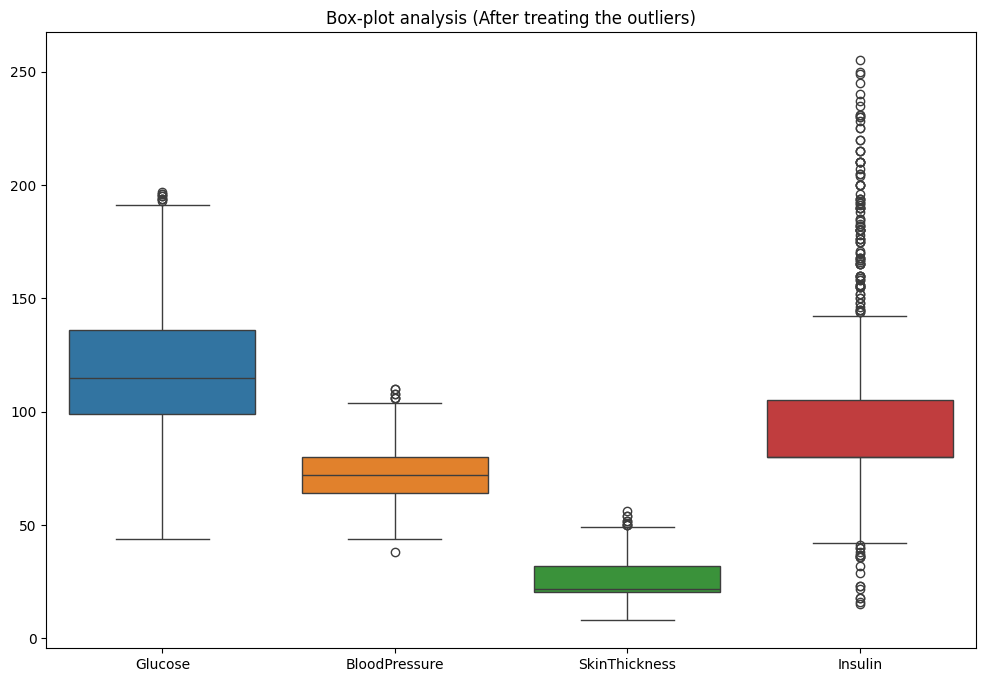

In [152]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.title('Box-plot analysis (After treating the outliers)')
plt.show()

***It can be observed from the above boxplot that outliers have been significantly been reduced***

# **EDA- Univariate Analysis**

## *Histograms for all the Data*

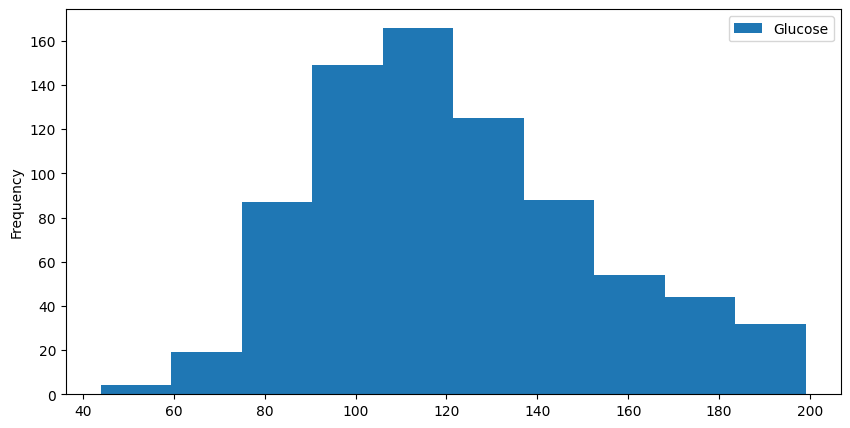

In [153]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

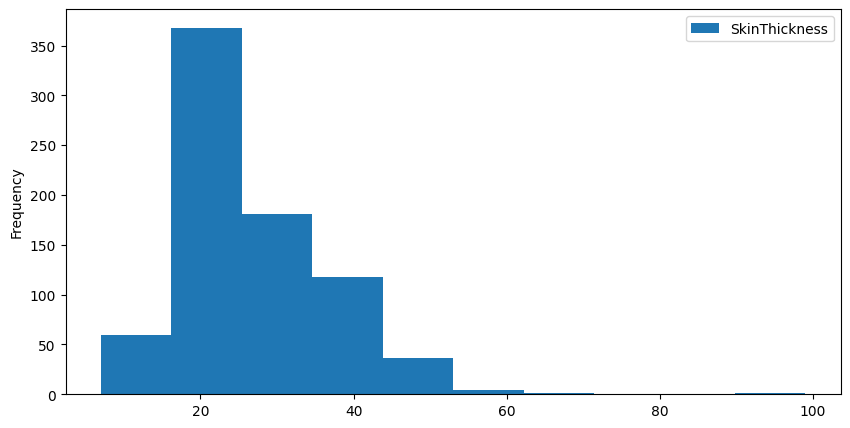

In [154]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

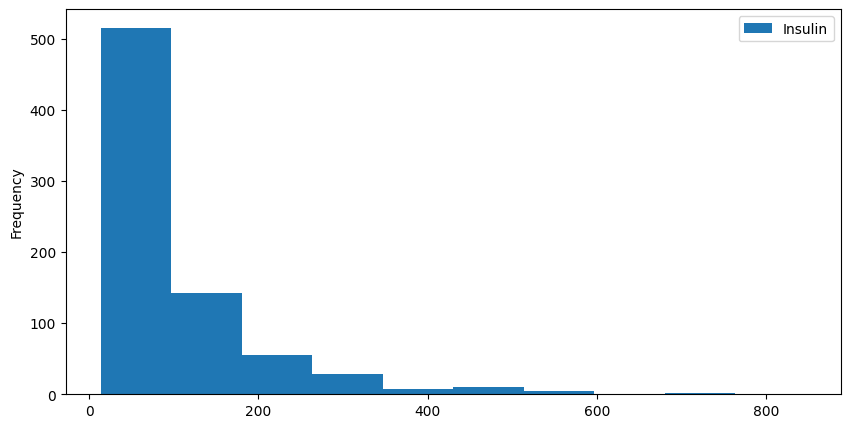

In [155]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

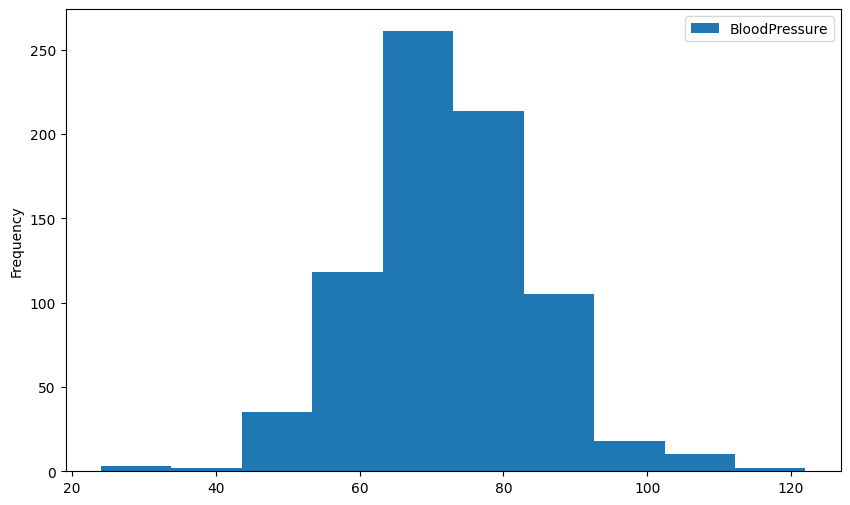

In [156]:
data['BloodPressure'].plot(kind='hist',figsize=(10,6))
plt.legend()
plt.show()

# **Visualization using various methods:** 

## **Violin plot**

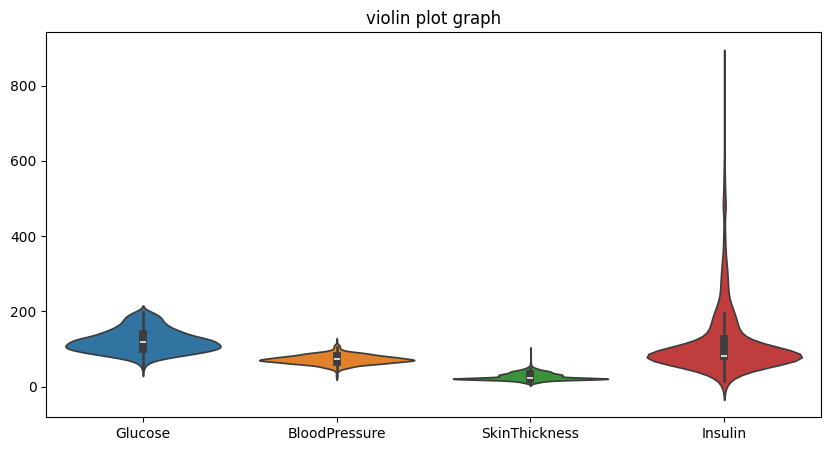

In [157]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data[selected_columns])
plt.title("violin plot graph")
plt.show()

*Violon plot's are basically the extension of the boxplot*

## **Kernal Density Estimation (KDE) plot for the selected features**

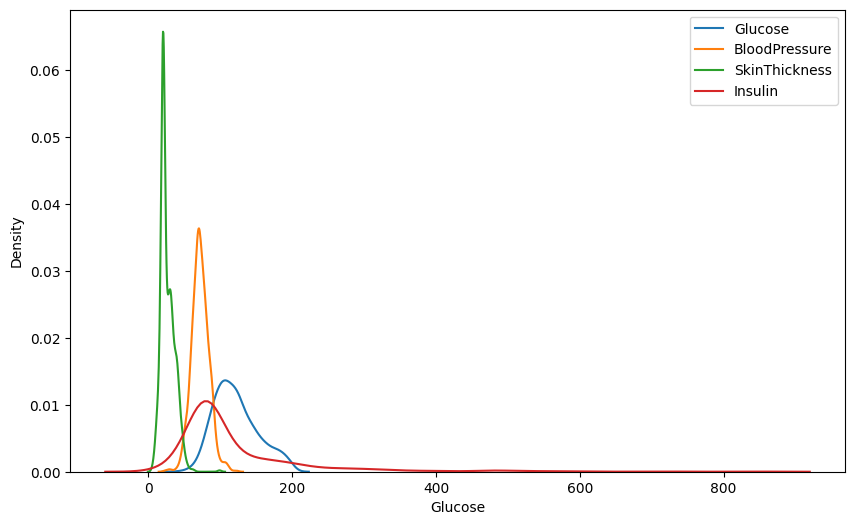

In [158]:
plt.figure(figsize=(10,6))
for column in selected_columns:
   sns.kdeplot(data[column],label=column)   
plt.legend()
plt.show()

*KDE is a non parametric method for estimating the probability density function (PDF) of a random variable . The KDE plot shows the estimated PDF of each features , which can be used to visualize the distribution of the data.*

In [159]:
data.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

In [160]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

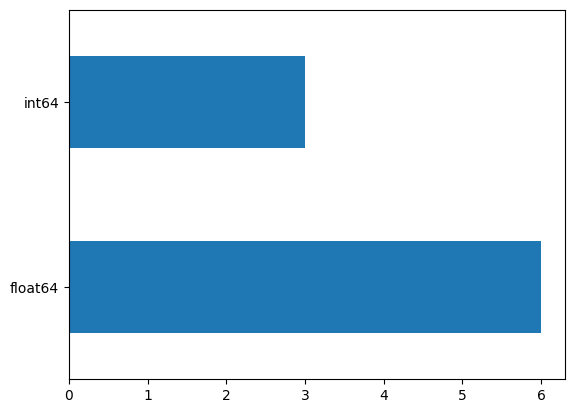

In [161]:
data.dtypes.value_counts().plot(kind='barh')
plt.show()

## **Data Exploration**

In [162]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

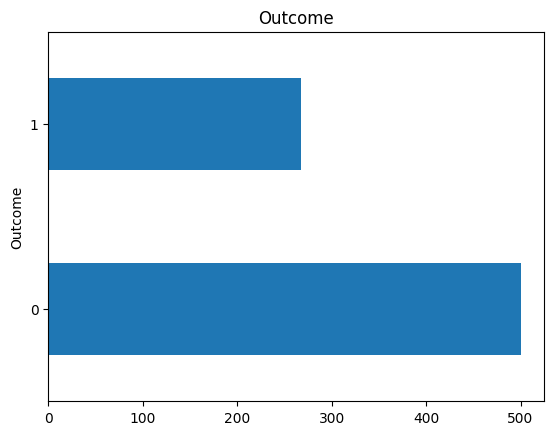

In [163]:
data['Outcome'].value_counts().plot(kind='barh')
plt.title('Outcome')
plt.show()

In [164]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

### **Inference from 'Outcome' graph**
 1.Class imbalance:
  -   class 0 has 500 instances.
  -   class 1 has 268 instances.
 
2.Performance:
  - This large difference may lead to performance imbalance leading to failure of machine learning algorithims.
      
      

In [165]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

## **Bi-variate Analysis**

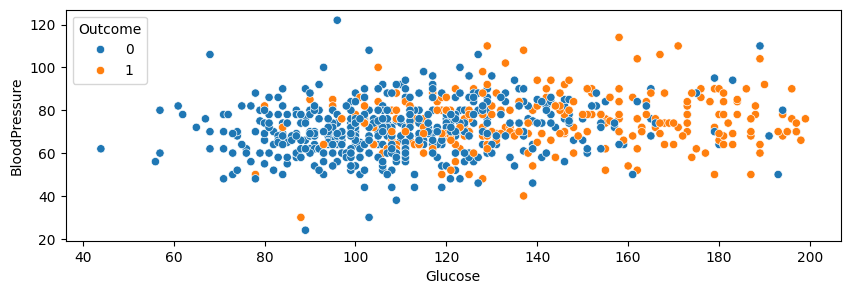

In [166]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

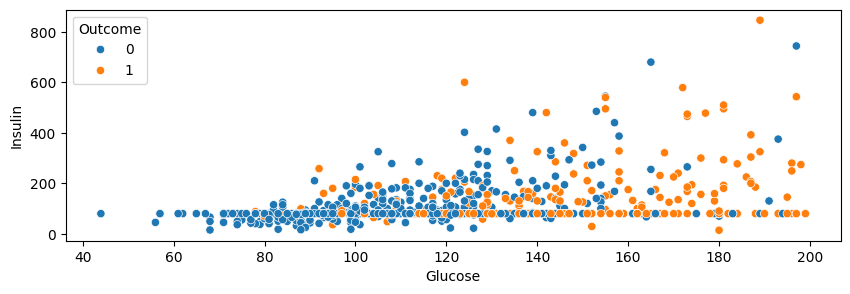

In [167]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Glucose',y='Insulin',hue='Outcome',data=data)
plt.show()

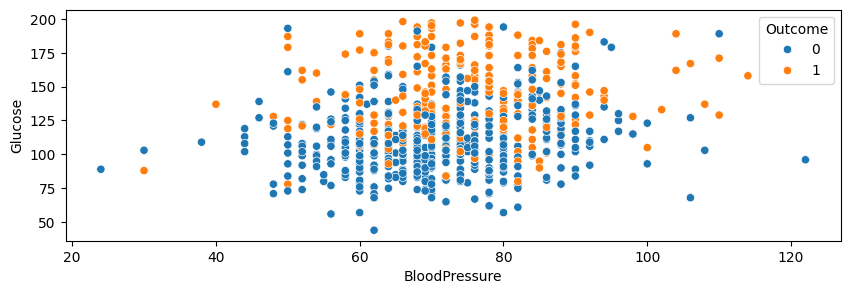

In [168]:
plt.figure(figsize=(10,3))
sns.scatterplot(y='Glucose',x='BloodPressure',hue='Outcome',data=data)
plt.show()

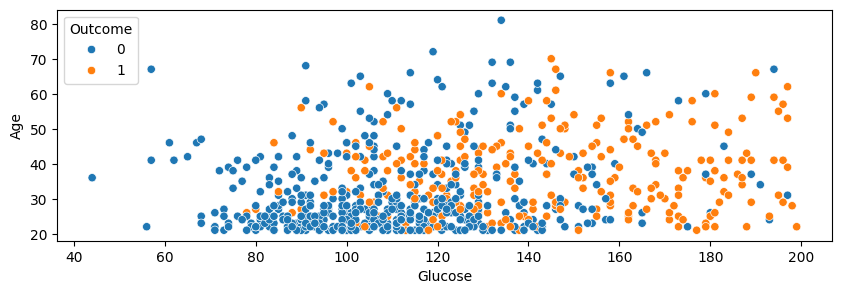

In [169]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Glucose',y='Age',hue='Outcome',data=data)
plt.show()

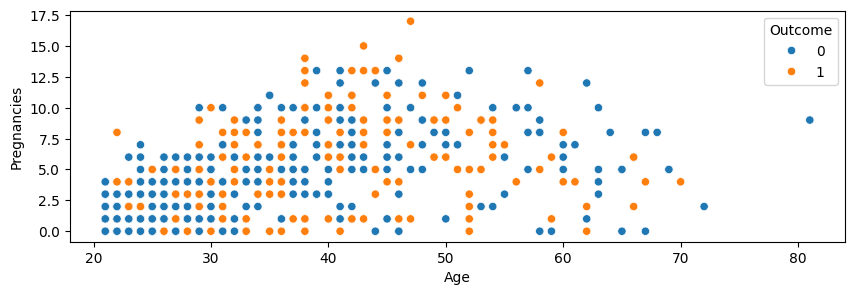

In [170]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

# Pair-Plot

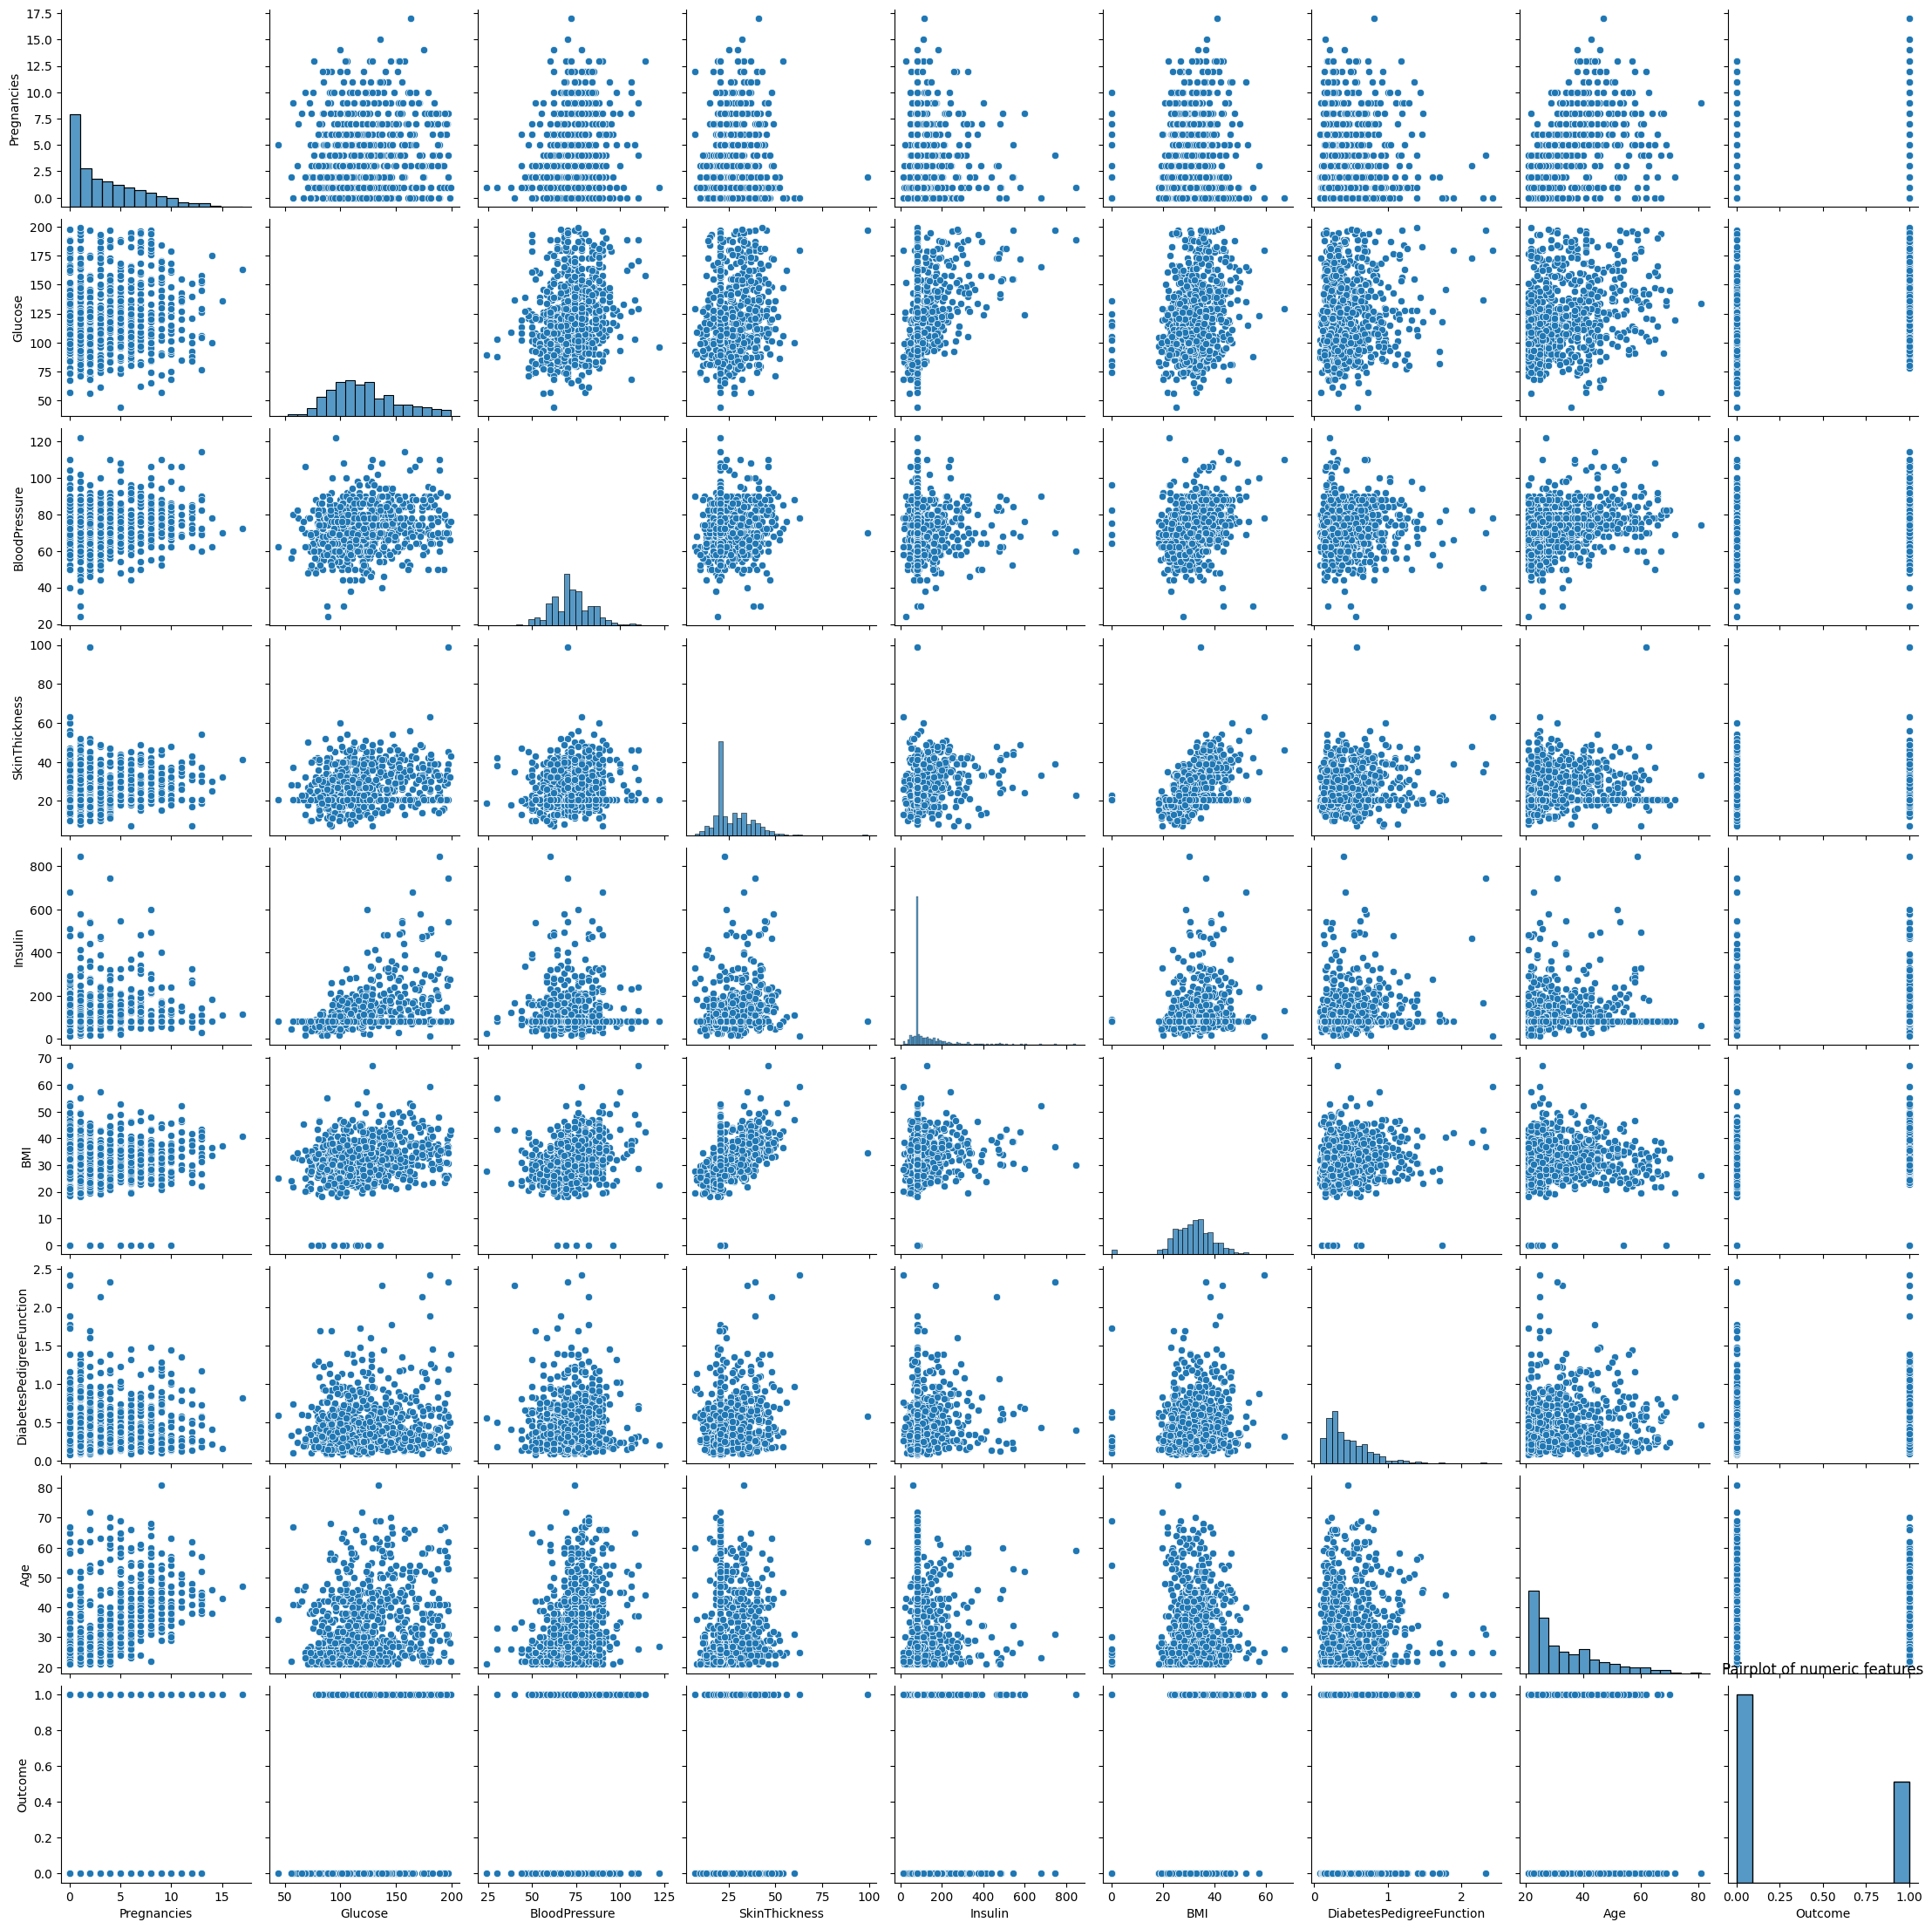

<Figure size 640x480 with 0 Axes>

In [171]:
sns.pairplot(data)
plt.title('Pairplot of numeric features',y=1.02)
plt.figure()
plt.show()


In [172]:
# Finding the Correlation of every feature with the Outcome (Target Variable)
data.corrwith(data['Outcome'])


Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [173]:

# Data Preparation for Modeling

x=data.drop(['Outcome'],axis=1)

y=data['Outcome']

In [174]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


# **Multi-Variate Analysis**
### Performs correlation analysis . Visually explore's 

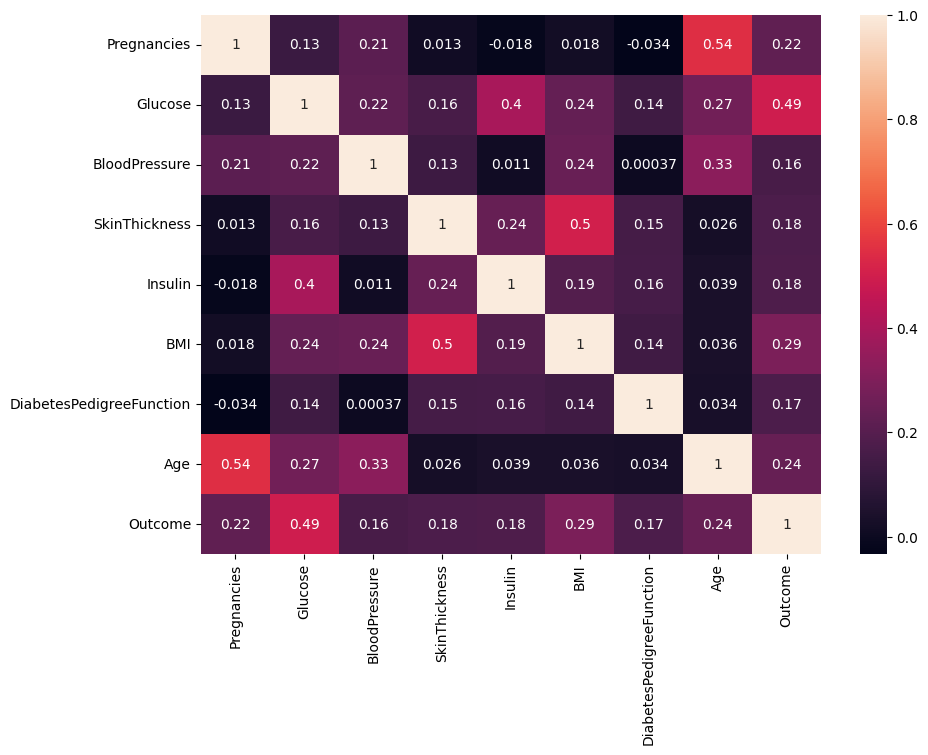

In [175]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

***we can see that the 'outcome' is having a maximum relation with Gluscose and minimum relation whith 'BloodPressure'***

# **Data Modelling**

## Some stratagies for model building
-  Descriptive Analysis
-  Data Treatment
-  Feature Extraction
-  Data is imbalanced
-  Building a model
-  Train a model
-  Evaluation
-  Hyper parameter tunning
-  create a classification report

# **Feature Selection**

In [176]:
y=data.Outcome
x=data.drop(['Outcome'],axis=1)

In [177]:
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [178]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [179]:
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [180]:
# Train-Test Split for Data Modeling
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [181]:
bestfeatures=SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [182]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

## **SMOTE to address the class Imbalance**

### **Training a model**

In [183]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [184]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =52)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())  
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))

 
print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


## **Applying appropriate models**

## **Mode1 1: Logistic Linear Regression**

In [185]:

logreg=LogisticRegression(solver='liblinear',random_state=123)


In [186]:

logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [187]:
prediction=logreg.predict(testx)


In [188]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

Accuracy_score - 0.7532467532467533
Mean_squared_error - 0.24675324675324675


In [189]:
# Confusion matrix
print((confusion_matrix(testy,prediction)))

[[72 23]
 [15 44]]


In [190]:
print((classification_report(testy,prediction)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        95
           1       0.66      0.75      0.70        59

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



In [191]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(testy, prediction)
recall = recall_score(testy, prediction)
f1 = f1_score(testy, prediction)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Precision: 0.6567164179104478
Recall: 0.7457627118644068
F1 Score: 0.6984126984126985


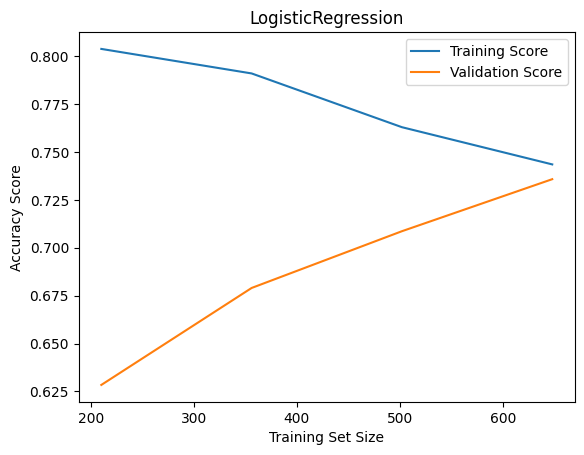

In [192]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    logreg, trainx_res, trainy_res, cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('LogisticRegression')
plt.legend()
plt.show()

In [193]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, trainx_res, trainy_res, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

Cross-Validation Scores: [0.75925926 0.70987654 0.74691358 0.71604938 0.74691358]
Mean Cross-Validation Score: 0.7358024691358025


In [194]:
# Fit the logistic regression model
logreg.fit(trainx_res, trainy_res)

# Get the feature coefficients
coefficients = logreg.coef_[0]


feature_importance_df = pd.DataFrame({
    'Coefficient': coefficients
})


feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importance
print(feature_importance_df)


   Coefficient  Absolute Coefficient
5     0.471654              0.471654
0     0.099560              0.099560
4     0.041703              0.041703
1     0.029824              0.029824
6     0.017243              0.017243
2     0.004774              0.004774
3    -0.000678              0.000678


AUC: 0.841


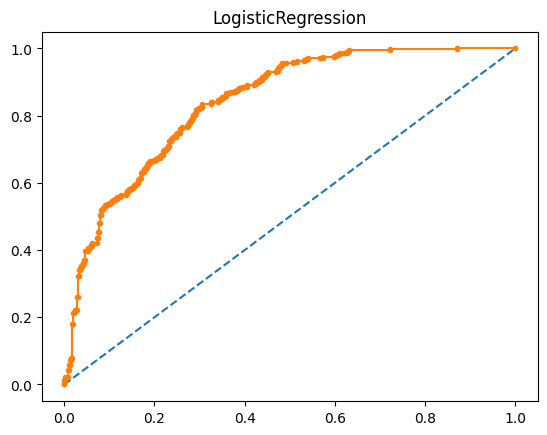

In [195]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# predict probabilities
probs = logreg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('LogisticRegression')
plt.show()

# **Model-2**
# **Random Forest Classifier**

In [196]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [197]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [198]:
rf_predict=rf.predict(testx)

In [199]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7792207792207793
Mean_squared_error - 0.22077922077922077


### **RandomForestClassifier(Hyper Parameter Tuning)**

In [200]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [201]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [202]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=5,max_samples=4,min_samples_leaf= 1,min_samples_split=3,
n_estimators= 400,random_state=42)

In [203]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=5, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [204]:
rf_grid_predict=rf_grid.predict(testx)

In [205]:
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [206]:
print((confusion_matrix(testy,prediction)))

[[72 23]
 [15 44]]


In [207]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        95
           1       0.66      0.75      0.70        59

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



In [208]:
precision_rf = precision_score(testy, rf_predict)
recall_rf = recall_score(testy, rf_predict)
f1_rf = f1_score(testy, rf_predict)

print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)

Precision: 0.6865671641791045
Recall: 0.7796610169491526
F1 Score: 0.7301587301587301


In [209]:
cv_scores_rf = cross_val_score(rf_grid, trainx_res, trainy_res, cv=5)
print('Cross-Validation Scores for Random Forest:', cv_scores_rf)
print('Mean Cross-Validation Score for Random Forest:', np.mean(cv_scores_rf))

Cross-Validation Scores for Random Forest: [0.74691358 0.70987654 0.75925926 0.80864198 0.75308642]
Mean Cross-Validation Score for Random Forest: 0.7555555555555555


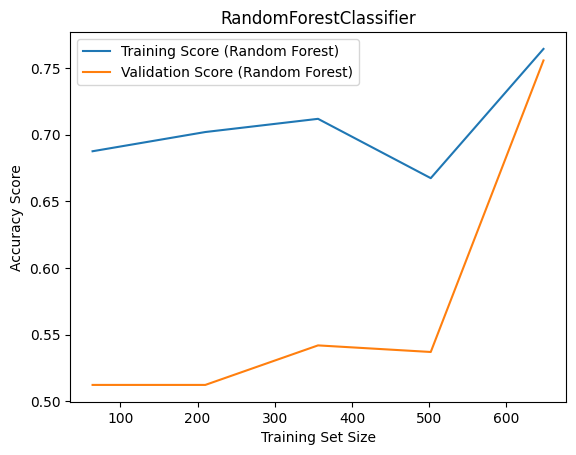

In [210]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_grid, trainx_res, trainy_res, cv=5, scoring='accuracy')

plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training Score (Random Forest)')
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label='Validation Score (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('RandomForestClassifier')
plt.legend()
plt.show()


AUC: 0.942


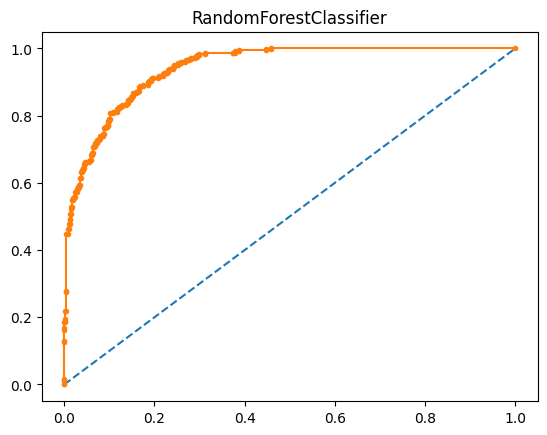

In [211]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# predict probabilities
probs = rf.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('RandomForestClassifier')
plt.show()

# **Model 3:**
# **DecisionTreeClassifier**

In [212]:
dc=DecisionTreeClassifier(random_state=42)

In [213]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [214]:
dc_pred=dc.predict(testx)

In [215]:
print("Accuracy score-",accuracy_score(testy,dc_pred))
print("Mean_squared_error-",mean_squared_error(testy,dc_pred))

Accuracy score- 0.6103896103896104
Mean_squared_error- 0.38961038961038963


### **DecisionTreeClassifier(Hyper parameter tuning)**

In [216]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [217]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [218]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [219]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [220]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [221]:
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

Accuracy_score - 0.6948051948051948
Mean_squared_error - 0.3051948051948052


In [222]:
print((confusion_matrix(testy,dc_final_pred)))

[[75 20]
 [27 32]]


In [223]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        95
           1       0.62      0.54      0.58        59

    accuracy                           0.69       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



In [224]:
precision_dc = precision_score(testy, dc_final_pred)
recall_dc = recall_score(testy, dc_final_pred)
f1_dc = f1_score(testy, dc_final_pred)

print('Precision:', precision_dc)
print('Recall:', recall_dc)
print('F1 Score:', f1_dc)

Precision: 0.6153846153846154
Recall: 0.5423728813559322
F1 Score: 0.5765765765765766


In [225]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dc = cross_val_score(dc_final, trainx_res, trainy_res, cv=5)
print('Cross-Validation Scores for Decision Tree:', cv_scores_dc)
print('Mean Cross-Validation Score for Decision Tree:', np.mean(cv_scores_dc))


Cross-Validation Scores for Decision Tree: [0.67901235 0.67901235 0.7345679  0.66666667 0.66049383]
Mean Cross-Validation Score for Decision Tree: 0.6839506172839507


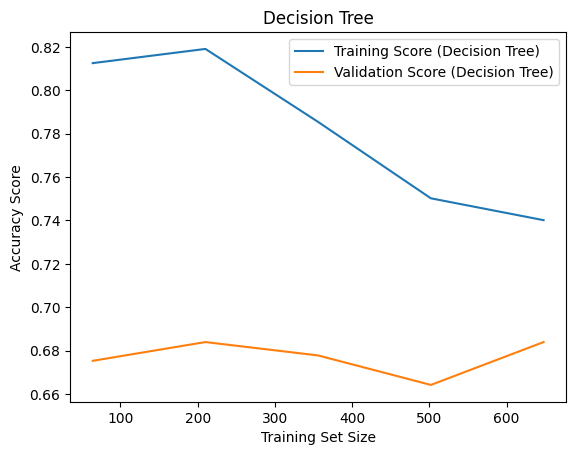

In [226]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes_dc, train_scores_dc, test_scores_dc = learning_curve(
    dc_final, trainx_res, trainy_res, cv=5, scoring='accuracy')

plt.plot(train_sizes_dc, np.mean(train_scores_dc, axis=1), label='Training Score (Decision Tree)')
plt.plot(train_sizes_dc, np.mean(test_scores_dc, axis=1), label='Validation Score (Decision Tree)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title('Decision Tree')
plt.show()


AUC: 0.790


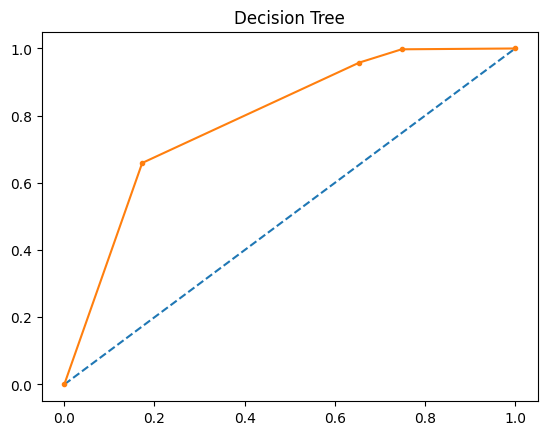

In [227]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# predict probabilities
probs = dc_final.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Decision Tree')
plt.show()

# **model-4**
# **KNN**

In [228]:
from sklearn.neighbors import KNeighborsClassifier


In [229]:
knn=KNeighborsClassifier(n_neighbors=4)

In [230]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [231]:
knn_pred=knn.predict(testx)

In [232]:
print("Accuracy score-",accuracy_score(testy,knn_pred))
print("Mean_squared_error-",mean_squared_error(testy,knn_pred))

Accuracy score- 0.6298701298701299
Mean_squared_error- 0.37012987012987014


In [233]:
print((confusion_matrix(testy,dc_final_pred)))

[[75 20]
 [27 32]]


In [234]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        95
           1       0.62      0.54      0.58        59

    accuracy                           0.69       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



In [235]:
precision_dc = precision_score(testy, knn_pred)
recall_dc = recall_score(testy, knn_pred)
f1_dc = f1_score(testy, knn_pred)

print('Precision:', precision_dc)
print('Recall:', recall_dc)
print('F1 Score:', f1_dc)

Precision: 0.5178571428571429
Recall: 0.4915254237288136
F1 Score: 0.5043478260869566


In [236]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# Perform 5-fold cross-validation
cv_scores_knn = cross_val_score(knn, trainx_res, trainy_res, cv=5)
print('Cross-Validation Scores for K-Nearest Neighbors:', cv_scores_knn)
print('Mean Cross-Validation Score for K-Nearest Neighbors:', np.mean(cv_scores_knn))

Cross-Validation Scores for K-Nearest Neighbors: [0.72839506 0.72222222 0.74074074 0.84567901 0.81481481]
Mean Cross-Validation Score for K-Nearest Neighbors: 0.7703703703703704


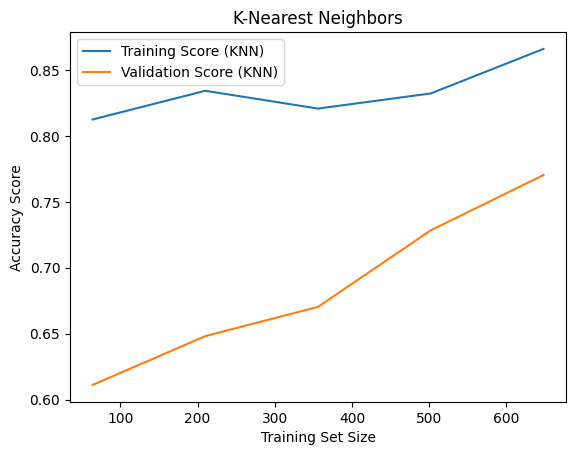

In [237]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(trainx_res, trainy_res)

# Learning Curve for K-Nearest Neighbors
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    knn, trainx_res, trainy_res, cv=5, scoring='accuracy')

plt.plot(train_sizes_knn, np.mean(train_scores_knn, axis=1), label='Training Score (KNN)')
plt.plot(train_sizes_knn, np.mean(test_scores_knn, axis=1), label='Validation Score (KNN)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title('K-Nearest Neighbors')
plt.show()

AUC: 0.951


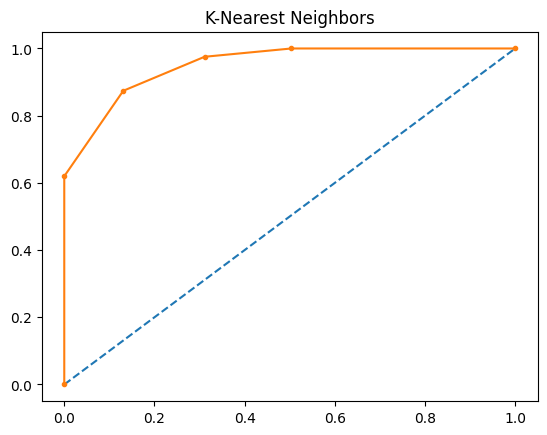

In [238]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# predict probabilities
probs = knn.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('K-Nearest Neighbors')
plt.show()

# **Model Accuracy Prediction**

In [239]:
Algorithims=['KNN','RandomForest','DecisionTree','Logreg']
Accuracy_score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred),accuracy_score(testy,prediction)]

In [240]:
accuracy_df=pd.DataFrame({'Algorithim':Algorithims,'Accuracy':Accuracy_score})
print(accuracy_df)

     Algorithim  Accuracy
0           KNN  0.629870
1  RandomForest  0.733766
2  DecisionTree  0.694805
3        Logreg  0.753247


## **Inferences from Model Comparison** 

-  Among all the models Tested so far , ***Logistic Linear Regression*** stands out with an Accuracy of 76%
-  Among all the models Tested , ***KNN*** gave us the Lowest Accuracy of 69.4%
-  ***Random Forest*** and ***Decision Tree*** can be considered with some changes made in the tuning process.
-  Additional evaluation metrics such as precision,recall,and F1 score should be considered for a comprehensive assessment of model performance.





Logistic Regression Metrics:
Accuracy: 0.753
Precision: 0.657
Recall: 0.746
F1 Score: 0.698

Random Forest Metrics:
Accuracy: 0.734
Precision: 0.610
Recall: 0.847
F1 Score: 0.709

Decision Tree Metrics:
Accuracy: 0.695
Precision: 0.615
Recall: 0.542
F1 Score: 0.577

K-Nearest Neighbors Metrics:
Accuracy: 0.630
Precision: 0.518
Recall: 0.492
F1 Score: 0.504



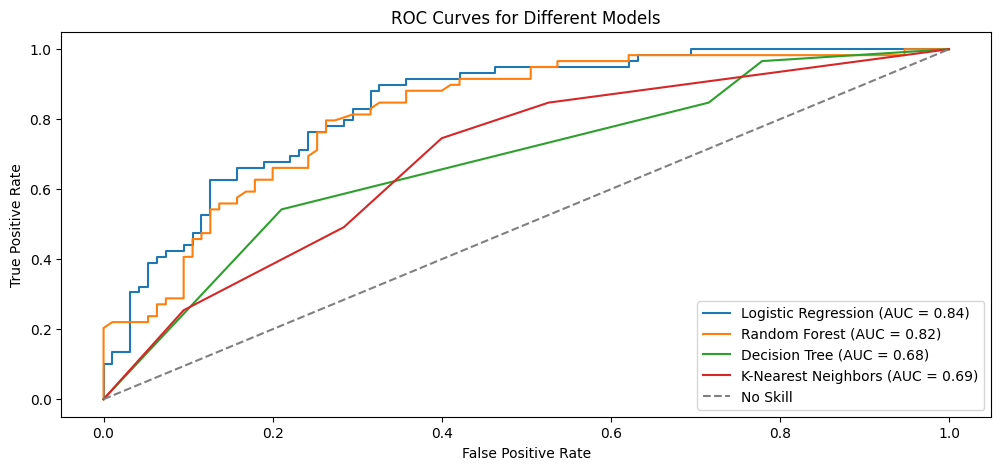

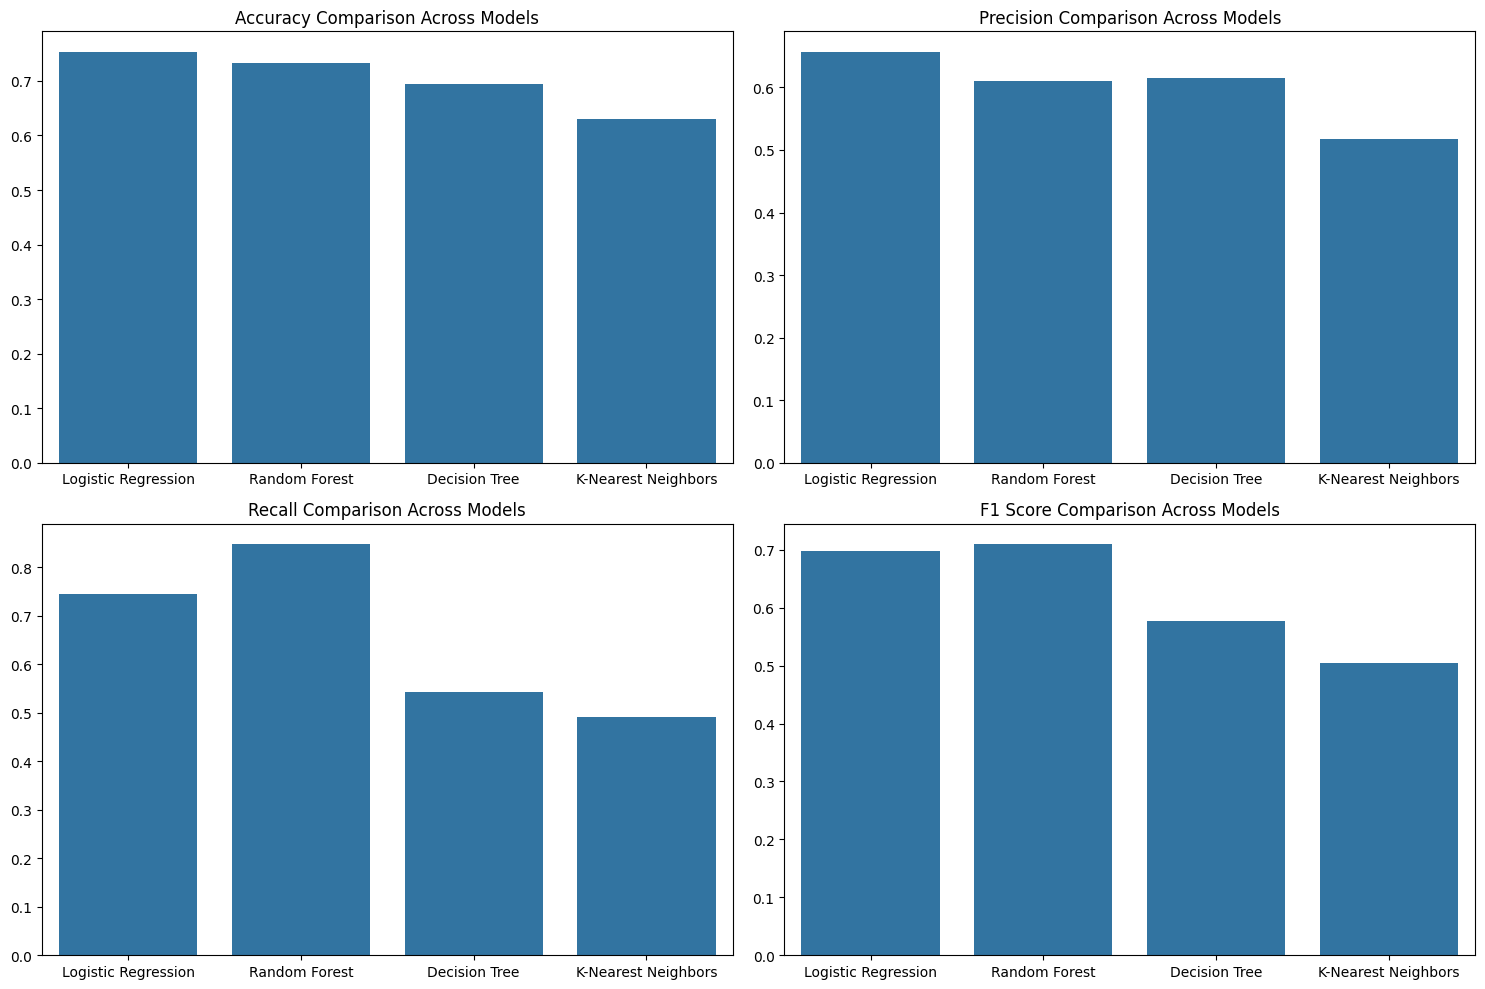

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def evaluate_model(model, test_data, true_labels):
    predictions = model.predict(test_data)
    probs = model.predict_proba(test_data)[:, 1]
    
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    fpr, tpr, thresholds = roc_curve(true_labels, probs)
    roc_auc = auc(fpr, tpr)  # Changed variable name to roc_auc_score
    
    return accuracy, precision, recall, f1, fpr, tpr, roc_auc

def plot_comparison(models, model_names, test_data, true_labels):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    results = {metric: [] for metric in metrics}
    roc_curves = []

    for model, name in zip(models, model_names):
        # Fit K-Nearest Neighbors model before evaluating
        if name == 'K-Nearest Neighbors':
            model.fit(trainx_res, trainy_res)
        
        accuracy, precision, recall, f1, fpr, tpr, roc_auc = evaluate_model(model, test_data, true_labels)
        
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        
        roc_curves.append((fpr, tpr, roc_auc))

        print(f"{name} Metrics:")
        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")
        print()

    # Plot ROC Curves
    plt.figure(figsize=(12, 5))
    for i, (fpr, tpr, roc_auc) in enumerate(roc_curves):
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models')
    plt.legend()
    plt.show()

    # Plot bar plots for each metric
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.barplot(x=model_names, y=results[metric], ax=axes[i])
        axes[i].set_title(f'{metric} Comparison Across Models')

    plt.tight_layout()
    plt.show()

# Models and their names
models = [logreg, rf_grid, dc_final, knn]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors']

# Test data and true labels
test_data = testx
true_labels = testy

# Plot and compare models
plot_comparison(models, model_names, test_data, true_labels)
